In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
    
import matplotlib.pyplot as plt
import h5py
import numpy as np
import get_xyz
import constants
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
run = 74

In [30]:
# load powder
fnam_powder = Path(constants.work) / f'powder/powder_run{run:>04}.h5'
if fnam_powder.is_file():
    with h5py.File(fnam_powder, 'r') as f:
        powder = np.clip(f['data'][()], 0, None)

# Load whitefield
with h5py.File(Path(constants.work) / f'whitefield/whitefield_run{run:>04}.h5', 'r') as f:
    whitefield = np.clip(f['whitefield'][()], 0, None)

# scale whitefield to powder
if fnam_powder.is_file():
    c = np.sum(powder * whitefield) / np.sum(whitefield**2)
    whitefield *= c
    whitefield[whitefield==0] = 1

    # normalise powder
    powder = np.clip((powder - whitefield) / whitefield**0.5, 0, None)
else:
    powder = whitefield

# load streaks
with h5py.File(Path(constants.work) / f'streaks/streaks_run{run:>04}.h5') as f:
    streaks = f['fs0_ss0_fs1_ss1_im'][()]

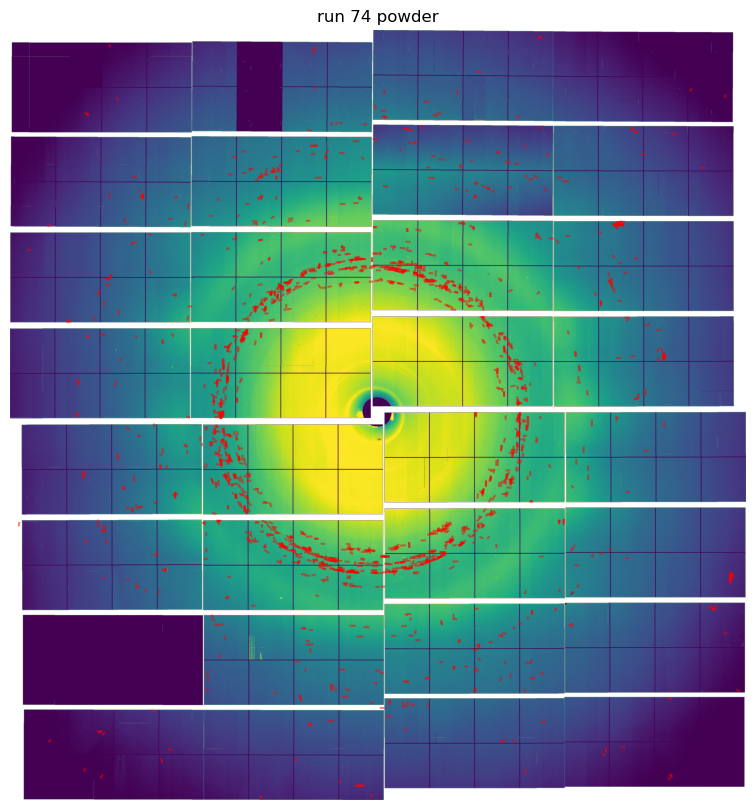

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
im = powder_im[::-1, ::-1]**0.2
ax.imshow(im, aspect='equal', origin='upper', vmin=np.percentile(im[im>0], 5), vmax=np.percentile(im[im>0], 99))

# plot 1000 streaks
for s in streaks[:50000]:
    ax.plot(-s[1::2]-centre[1], -s[0::2]-centre[0], c='red', alpha=0.5)

ax.set_axis_off()
ax.set_title(f'run {run} powder')
plt.show()